# Логнормальное распределение и ЦПТ

In [68]:
#from scipy.stats import mielke
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from matplotlib import mlab
from math import *

## Краткое описание логнормального распределения

https://ru.wikipedia.org/wiki/Логнормальное_распределение - ссылка на логнормальное распределение

Математическое ожидание $$ E(X) = e^{\frac{\sigma^2}{2}}$$

Дисперсия $$ D(X) = {(e^{\sigma^2}-1)}{e^{\sigma^2}}$$

## Логнормальное распределение: статистики и график

параметр распределения ${\sigma}$ (переменная s):

In [69]:
s=0.888

расчёт мат.ожидания EX и дисперсии DX

In [70]:
EX=exp(s**2/2)
DX=(exp(s**2)-1)*exp(s**2)

построение графика для выборки 1000:

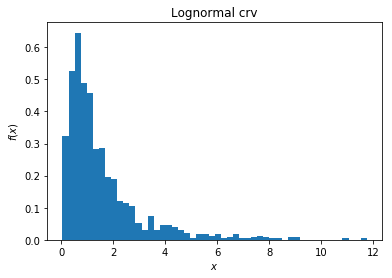

In [71]:
lognorm_rv = sts.lognorm
nabor = lognorm_rv.rvs(s,size=1000)
x = np.linspace(0,10,1000)
pdf = lognorm_rv.pdf(s,x)
cdf = lognorm_rv.cdf(s,x)
plt.hist(nabor, normed=True,bins=50)
plt.title('Lognormal crv')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

## Проверка ЦПТ для логнормального распределения при различных вариантах набора выборки

Количество выборок остаётся постоянным (переменная m) = 1000. Набор выборки (количество значений, входящих в одну выборку) меняется (переменная n): 5, 20, 100. Результатом является график сравнения случайной выборки, соответствующей логнормальному распределению (синяя гистограмма), и функции нормального распределения (оранжевая кривая), посчитанной исходя из предрассчитанных значений дисперсии и матожидания, соответствующих выбранным значениям n.

### расчёт для n = 5

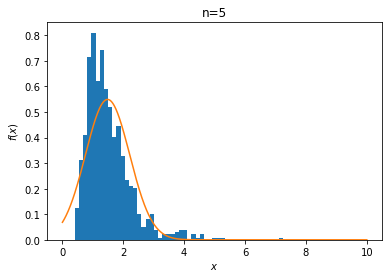

In [72]:
m=1000
n=5
# расчёт матрицы a для определения средних значений набора выборки, состоящей из n значений.
a = np.zeros([m,n]) 
nabor1=np.zeros([m]) 
for i in range (m):
    nabor1[i]=np.mean(lognorm_rv.rvs(s,size=n))   
plt.hist(nabor1, normed=True,bins=50)
x = np.linspace(0,10,1000)
norm_rv = sts.norm(EX, sqrt(DX/n))
pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)
plt.title('n=5')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show ()


### расчёт для n = 20

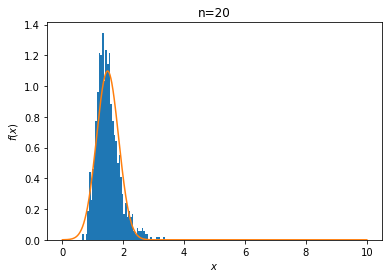

In [73]:
m=1000
n=20
a = np.zeros([m,n])
nabor2=np.zeros([m]) 
for i in range (m):
    nabor2[i]=np.mean(lognorm_rv.rvs(s,size=n))   
plt.hist(nabor2, normed=True,bins=50)
norm_rv = sts.norm(EX, sqrt(DX/n))
pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)
plt.title('n=20')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show ()


### расчёт для n = 100

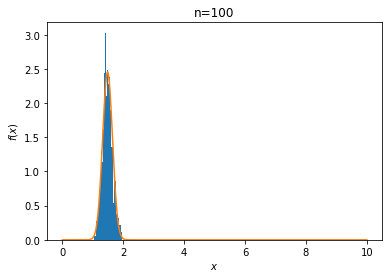

In [74]:
m=1000
n=100
a = np.zeros([m,n])
nabor3=np.zeros([m]) 
for i in range (m):
    nabor3[i]=np.mean(lognorm_rv.rvs(s,size=n))    
plt.hist(nabor3, normed=True,bins=50)
norm_rv = sts.norm(EX, sqrt(DX/n))
pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)
plt.title('n=100')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show ()


## Вывод:

При увеличении набора выборки (n) растёт точность приближения (аппроксимация) нормальным распределением исходного распределения(в данном случае lognormal-распределения), что является подтверждением ЦПТ. В нашем примере при n=100 мы получили график более приближённый, чем при n=5.